In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import networkx as nx
%matplotlib inline
from ast import literal_eval

In [2]:
raw_df=pd.read_csv('Tweets_Processed.csv')
raw_df['hastags']= (raw_df['hastags'])
raw_df

,tweet_id,author_id,tweet_by,tweet_by_verified,user_location,text,clean_tweet,adjectives,sentiment_text,created_at,source,retweets,replies,likes,quote_count,hastags,mentions,subjectivity,polarity,sentiment
0,1499894980454002691,120520987,mesushovan,False,India,"Narendra ""Jumla"" Modi first said people consum...",first said people salt people salt nobody exce...,last wash,first said people salt people salt nobody exce...,2022-03-04 23:50:04+00:00,Twitter Web App,0,0,1,0,"['UttarPradeshElections2022', 'OperationGanga']",[],0.200000,0.125000,Positive
1,1499892794340478979,1235395793302872064,IAS_vinod_,False,"Rajasthan, India",Jai hind salute \n#OperationGanga https://t.co...,hind salute,NaN,hind salute,2022-03-04 23:41:23+00:00,Twitter for Android,0,0,3,0,['OperationGanga'],[],0.000000,0.000000,Neutral
2,1499892360368594944,55627836,sujitmahapatra,False,"NJ, USA",@Reuters #OperationGanga is underway by @MEAIn...,underway hope safe evacuation everyone trapped,safe,underway hope safe evacuation everyone trapped,2022-03-04 23:39:40+00:00,Twitter Web App,0,0,9,0,['OperationGanga'],"['Reuters', 'MEAIndia']",0.250000,0.150000,Positive
3,1499891350476828673,1137953360462532608,MOS_MEA,True,NaN,"#OperationGanga is in full swing, with over 11...",full swing far happy received group new airpor...,full happy new foreign constant,full swing far happy received group new airpor...,2022-03-04 23:35:39+00:00,Twitter for Android,44,5,197,4,['OperationGanga'],['AirAsiaIndia'],0.577146,0.210227,Positive
4,1499889930419548163,36327407,htTweets,True,India,"A man from Kerala, along with his pregnant wif...",man along pregnant wife trapped ongoing move s...,pregnant ongoing,man along pregnant wife trapped ongoing move s...,2022-03-04 23:30:00+00:00,TweetDeck,9,2,22,0,"['Kyiv', 'RussiaUkraineWar', 'OperationGanga']",[],0.250000,0.066667,Positive
5,1499888253029212162,2261218201,RepublicBhratTV,False,"Mumbai, India",In my opinion parents of all evacuated student...,opinion student taken free ride home country d...,free enough,opinion student taken free ride home country d...,2022-03-04 23:23:20+00:00,Twitter for iPhone,23,16,56,0,"['Ukriane', 'pmcaresfund', 'OperationGanga']",['MeenaDasNarayan'],0.650000,0.200000,Positive
6,1499887031874625536,754932961691119616,agulindian,False,"Melbourne, Victoria",@srivatsayb @RahulGandhi Just think before yiu...,think speak watching,NaN,think speak watching,2022-03-04 23:18:29+00:00,Twitter for iPhone,0,0,1,0,['operationganga'],"['srivatsayb', 'RahulGandhi']",0.000000,0.000000,Neutral
7,1499886657159507970,381891557,eOrganiser,True,New Delhi,"Congress, #RahulGandhi and #NDTV used a Congr...",congress used congress leader daughter attack ...,congress,congress used congress leader daughter attack ...,2022-03-04 23:17:00+00:00,Twitter Web App,36,1,75,1,"['RahulGandhi', 'NDTV', 'OperationGanga']",[],0.000000,0.000000,Neutral
8,1499886597243871233,1482733308249264130,Deborah27264348,False,NaN,"Nearly 10,800 Indians brought back by special ...",nearly brought back special far special civili...,special special civilian,nearly brought back special far special civili...,2022-03-04 23:16:45+00:00,Twitter for Android,1,0,1,0,"['Ukraine', 'OperationGanga']",['MoCA_GoI'],0.590476,0.169048,Positive
9,1499886431153852416,1426305574258442242,RiddhiGoyal07,False,NaN,"@Asifrahmanmolla Understand the agenda, Sir. #...",understand agenda sir till th march know know,understand,understand agenda sir till th march know know,2022-03-04 23:16:06+00:00,Twitter Web App,0,0,2,0,['OperationGanga'],['Asifrahmanmolla'],0.000000,0.000000,Neutral


In [3]:
hash_tags=set()
for tags in raw_df.hastags:
    for s in literal_eval(tags):
        hash_tags.add(s.lower())
hash_tags

{'kyiv',
 'ndtv',
 'operationganga',
 'pmcaresfund',
 'rahulgandhi',
 'russiaukrainewar',
 'ukraine',
 'ukriane',
 'uttarpradeshelections2022'}

In [4]:
mentions=set()
for mention in raw_df.mentions:
    for m in literal_eval(mention):
        mentions.add(m)
mentions

{'AirAsiaIndia',
 'Asifrahmanmolla',
 'MEAIndia',
 'MeenaDasNarayan',
 'MoCA_GoI',
 'RahulGandhi',
 'Reuters',
 'srivatsayb'}

In [5]:

graph1= nx.Graph()

In [6]:
def build_hash_tag_edges():
    x=[]
    y=[]
    for idx, val in enumerate(raw_df.tweet_by.tolist()):
         for s in literal_eval(raw_df.iloc[idx].hastags):
                    x.append(val)
                    y.append(s)
    return list(zip(x, y))
def build_mention_edges():
    x=[]
    y=[]
    for idx, val in enumerate(raw_df.tweet_by.tolist()):
         for s in literal_eval(raw_df.iloc[idx].mentions):
                    x.append(val)
                    y.append(s)
    return list(zip(x, y))

def add_nodes():
    graph1.add_nodes_from(raw_df.tweet_by.tolist(), label='tweet_by')
    graph1.add_nodes_from(raw_df.sentiment.tolist(),label='sentiment')
    graph1.add_nodes_from(hash_tags,label='hash_tags')
    graph1.add_nodes_from(mentions,label='mentions')
        
def add_edges():
    sentiment_edges=list(zip(raw_df.tweet_by, raw_df.sentiment))
    hash_tag_edges=build_hash_tag_edges()
    mention_edges=build_mention_edges()
    

    print(hash_tag_edges)
    graph1.add_edges_from(sentiment_edges, label='Sentiment')
    graph1.add_edges_from(hash_tag_edges, label='tags')
    graph1.add_edges_from(mention_edges, label='mentions')

In [7]:
add_nodes()

In [8]:
add_edges()

[('mesushovan', 'UttarPradeshElections2022'), ('mesushovan', 'OperationGanga'), ('IAS_vinod_', 'OperationGanga'), ('sujitmahapatra', 'OperationGanga'), ('MOS_MEA', 'OperationGanga'), ('htTweets', 'Kyiv'), ('htTweets', 'RussiaUkraineWar'), ('htTweets', 'OperationGanga'), ('RepublicBhratTV', 'Ukriane'), ('RepublicBhratTV', 'pmcaresfund'), ('RepublicBhratTV', 'OperationGanga'), ('agulindian', 'operationganga'), ('eOrganiser', 'RahulGandhi'), ('eOrganiser', 'NDTV'), ('eOrganiser', 'OperationGanga'), ('Deborah27264348', 'Ukraine'), ('Deborah27264348', 'OperationGanga'), ('RiddhiGoyal07', 'OperationGanga')]


In [9]:
nx.info(graph1)

'Graph with 36 nodes and 36 edges'

In [10]:
graph1.nodes()

NodeView(('mesushovan', 'IAS_vinod_', 'sujitmahapatra', 'MOS_MEA', 'htTweets', 'RepublicBhratTV', 'agulindian', 'eOrganiser', 'Deborah27264348', 'RiddhiGoyal07', 'Positive', 'Neutral', 'uttarpradeshelections2022', 'ukraine', 'pmcaresfund', 'ukriane', 'ndtv', 'operationganga', 'russiaukrainewar', 'rahulgandhi', 'kyiv', 'srivatsayb', 'MeenaDasNarayan', 'RahulGandhi', 'MoCA_GoI', 'Reuters', 'Asifrahmanmolla', 'AirAsiaIndia', 'MEAIndia', 'UttarPradeshElections2022', 'OperationGanga', 'Kyiv', 'RussiaUkraineWar', 'Ukriane', 'NDTV', 'Ukraine'))

In [11]:

graph1.edges()

EdgeView([('mesushovan', 'Positive'), ('mesushovan', 'UttarPradeshElections2022'), ('mesushovan', 'OperationGanga'), ('IAS_vinod_', 'Neutral'), ('IAS_vinod_', 'OperationGanga'), ('sujitmahapatra', 'Positive'), ('sujitmahapatra', 'OperationGanga'), ('sujitmahapatra', 'Reuters'), ('sujitmahapatra', 'MEAIndia'), ('MOS_MEA', 'Positive'), ('MOS_MEA', 'OperationGanga'), ('MOS_MEA', 'AirAsiaIndia'), ('htTweets', 'Positive'), ('htTweets', 'Kyiv'), ('htTweets', 'RussiaUkraineWar'), ('htTweets', 'OperationGanga'), ('RepublicBhratTV', 'Positive'), ('RepublicBhratTV', 'Ukriane'), ('RepublicBhratTV', 'pmcaresfund'), ('RepublicBhratTV', 'OperationGanga'), ('RepublicBhratTV', 'MeenaDasNarayan'), ('agulindian', 'Neutral'), ('agulindian', 'operationganga'), ('agulindian', 'srivatsayb'), ('agulindian', 'RahulGandhi'), ('eOrganiser', 'Neutral'), ('eOrganiser', 'RahulGandhi'), ('eOrganiser', 'NDTV'), ('eOrganiser', 'OperationGanga'), ('Deborah27264348', 'Positive'), ('Deborah27264348', 'Ukraine'), ('Debor

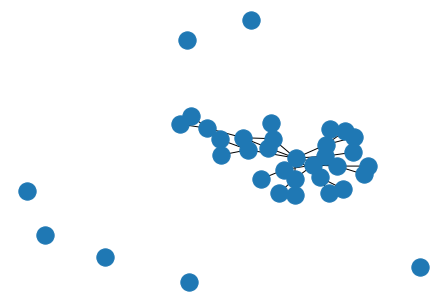

In [12]:
import math
pos = nx.spring_layout(graph1)
nx.draw(graph1,pos=pos)

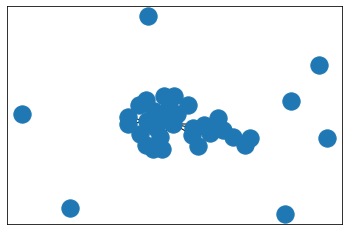

In [13]:
# method 2
nx.draw_networkx(graph1,with_labels=False)



In [14]:
sorted(graph1.degree, key=lambda x: x[1], reverse=True)

[('OperationGanga', 9),
 ('Positive', 6),
 ('RepublicBhratTV', 5),
 ('sujitmahapatra', 4),
 ('htTweets', 4),
 ('agulindian', 4),
 ('eOrganiser', 4),
 ('Deborah27264348', 4),
 ('Neutral', 4),
 ('mesushovan', 3),
 ('MOS_MEA', 3),
 ('RiddhiGoyal07', 3),
 ('IAS_vinod_', 2),
 ('RahulGandhi', 2),
 ('pmcaresfund', 1),
 ('operationganga', 1),
 ('srivatsayb', 1),
 ('MeenaDasNarayan', 1),
 ('MoCA_GoI', 1),
 ('Reuters', 1),
 ('Asifrahmanmolla', 1),
 ('AirAsiaIndia', 1),
 ('MEAIndia', 1),
 ('UttarPradeshElections2022', 1),
 ('Kyiv', 1),
 ('RussiaUkraineWar', 1),
 ('Ukriane', 1),
 ('NDTV', 1),
 ('Ukraine', 1),
 ('uttarpradeshelections2022', 0),
 ('ukraine', 0),
 ('ukriane', 0),
 ('ndtv', 0),
 ('russiaukrainewar', 0),
 ('rahulgandhi', 0),
 ('kyiv', 0)]

In [15]:


# Degree of Connection 
nx.degree(graph1,'RepublicBhratTV')



5

In [16]:
#Most Influential
#nx.degree_centrality()


most_influential = nx.degree_centrality(graph1)
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])



OperationGanga 0.2571428571428571
Positive 0.17142857142857143
RepublicBhratTV 0.14285714285714285
sujitmahapatra 0.11428571428571428
htTweets 0.11428571428571428
agulindian 0.11428571428571428
eOrganiser 0.11428571428571428
Deborah27264348 0.11428571428571428
Neutral 0.11428571428571428
mesushovan 0.08571428571428572
MOS_MEA 0.08571428571428572
RiddhiGoyal07 0.08571428571428572
IAS_vinod_ 0.05714285714285714
RahulGandhi 0.05714285714285714
pmcaresfund 0.02857142857142857
operationganga 0.02857142857142857
srivatsayb 0.02857142857142857
MeenaDasNarayan 0.02857142857142857
MoCA_GoI 0.02857142857142857
Reuters 0.02857142857142857
Asifrahmanmolla 0.02857142857142857
AirAsiaIndia 0.02857142857142857
MEAIndia 0.02857142857142857
UttarPradeshElections2022 0.02857142857142857
Kyiv 0.02857142857142857
RussiaUkraineWar 0.02857142857142857
Ukriane 0.02857142857142857
NDTV 0.02857142857142857
Ukraine 0.02857142857142857
uttarpradeshelections2022 0.0
ukraine 0.0
ukriane 0.0
ndtv 0.0
russiaukrainew

In [17]:
### Most Important Connection
#nx.eigenvector_centrality
most_important_link = nx.eigenvector_centrality(graph1)
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

OperationGanga 0.5216825443597493
Positive 0.3853791625298223
RepublicBhratTV 0.2792327509792147
sujitmahapatra 0.2592725020000699
htTweets 0.2592725020000699
Deborah27264348 0.2592725020000699
mesushovan 0.24197540731222855
MOS_MEA 0.24197540731222855
eOrganiser 0.19693142635637095
RiddhiGoyal07 0.17966210874848199
IAS_vinod_ 0.1684251507909052
Neutral 0.15178301750532716
pmcaresfund 0.06983147865027908
MeenaDasNarayan 0.06983147865027908
Ukriane 0.06983147865027908
Reuters 0.06483981041942549
MEAIndia 0.06483981041942549
Kyiv 0.06483981041942549
RussiaUkraineWar 0.06483981041942549
MoCA_GoI 0.06483981041942548
Ukraine 0.06483981041942548
RahulGandhi 0.06473033294815077
agulindian 0.061892463121481306
AirAsiaIndia 0.060514126310633375
UttarPradeshElections2022 0.060514126310633375
NDTV 0.049250697272750686
Asifrahmanmolla 0.04493149090607129
operationganga 0.01547963567540008
srivatsayb 0.01547963567540008
uttarpradeshelections2022 1.3146195960779059e-21
ukraine 1.3146195960779059e-21

In [18]:
### Betweener Centrality
#Bridge/Connect
best_connector = nx.betweenness_centrality(graph1)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])



OperationGanga 0.41092436974789914
eOrganiser 0.1400560224089636
RepublicBhratTV 0.1341736694677871
Neutral 0.10210084033613445
Positive 0.1
sujitmahapatra 0.09215686274509804
htTweets 0.09215686274509804
Deborah27264348 0.09215686274509804
agulindian 0.09159663865546218
RiddhiGoyal07 0.07997198879551819
mesushovan 0.0484593837535014
MOS_MEA 0.0484593837535014
IAS_vinod_ 0.03459383753501402
RahulGandhi 0.028991596638655463
uttarpradeshelections2022 0.0
ukraine 0.0
pmcaresfund 0.0
ukriane 0.0
ndtv 0.0
operationganga 0.0
russiaukrainewar 0.0
rahulgandhi 0.0
kyiv 0.0
srivatsayb 0.0
MeenaDasNarayan 0.0
MoCA_GoI 0.0
Reuters 0.0
Asifrahmanmolla 0.0
AirAsiaIndia 0.0
MEAIndia 0.0
UttarPradeshElections2022 0.0
Kyiv 0.0
RussiaUkraineWar 0.0
Ukriane 0.0
NDTV 0.0
Ukraine 0.0


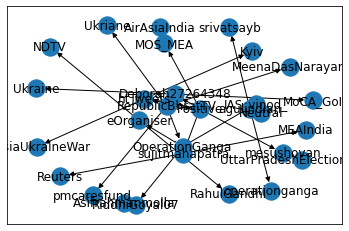

In [19]:
group1 = nx.bfs_tree(graph1,'RepublicBhratTV')
nx.draw_networkx(group1)

In [20]:
#For Undirected GRaph
#nx.node_connected_component(graph1,"JagranEnglish")

In [21]:


### Association 
#nx.clustering
nx.clustering(graph1)


{'mesushovan': 0,
 'IAS_vinod_': 0,
 'sujitmahapatra': 0,
 'MOS_MEA': 0,
 'htTweets': 0,
 'RepublicBhratTV': 0,
 'agulindian': 0,
 'eOrganiser': 0,
 'Deborah27264348': 0,
 'RiddhiGoyal07': 0,
 'Positive': 0,
 'Neutral': 0,
 'uttarpradeshelections2022': 0,
 'ukraine': 0,
 'pmcaresfund': 0,
 'ukriane': 0,
 'ndtv': 0,
 'operationganga': 0,
 'russiaukrainewar': 0,
 'rahulgandhi': 0,
 'kyiv': 0,
 'srivatsayb': 0,
 'MeenaDasNarayan': 0,
 'RahulGandhi': 0,
 'MoCA_GoI': 0,
 'Reuters': 0,
 'Asifrahmanmolla': 0,
 'AirAsiaIndia': 0,
 'MEAIndia': 0,
 'UttarPradeshElections2022': 0,
 'OperationGanga': 0,
 'Kyiv': 0,
 'RussiaUkraineWar': 0,
 'Ukriane': 0,
 'NDTV': 0,
 'Ukraine': 0}